# iJN678 Autotrophic Condition

Set the environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
import matplotlib.pyplot as plt
from cobrapy_bigg_client import client
from cobra.flux_analysis.loopless import loopless_solution
from cobra.flux_analysis import production_envelope

pd.set_option('display.max_rows', 1000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)
%matplotlib inline

Load and save the model

In [2]:
import cobra
cobra_config = cobra.Configuration()
model_orig = client.download_model('iJN678', save=False) # Loading the model to the simulation
#model_orig.solver = "glpk_exact" # Takes a long time
model_orig.solver = 'glpk'
model = model_orig.copy()

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Model Attribute Summary

In [3]:
model

Name,iJN678
Memory address,0x07fae58804c70
Number of metabolites,795
Number of reactions,863
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_SynHetero - 1.0*BIOMASS_Ec_SynHetero_reverse_5d8af
Compartments,"cytosol, periplasm, thylakoid, extracellular space"


## iJN678 Biomass Functions

Identify the iJN678 biomass functions

In [4]:
for reaction in model.reactions.query('BIOMASS', 'id'):
    print(reaction.id,'   ',reaction.name)

BIOMASS_Ec_SynAuto     Autotrophic Biomass Ecuation
BIOMASS_Ec_SynMixo     Mixotrophic Biomass Ecuation
BIOMASS_Ec_SynHetero     Heterotrophic Biomass Ecuation


Autotropic biomass function

In [5]:
model.reactions.BIOMASS_Ec_SynAuto

Reaction identifier,BIOMASS_Ec_SynAuto
Name,Autotrophic Biomass Ecuation
Memory address,0x07fae5cc19d00
Stoichiometry,0.000223 10fthf_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.39075 ala__L_c + 0.000223 amet_c + 0.23195 arg__L_c + 0.18658 asn__L_c + 0.23149 asp__L_c + 53.4862 atp_c +... 0.000223 10-Formyltetrahydrofolate + 0.000223 5-Methyltetrahydrofolate + 0.000279 Acetyl-CoA + 0.000223 Adenosylcobalamin + 0.39075 L-Alanine + 0.000223 S-Adenosyl-L-methionine + 0.23195 L-Arginine...
GPR,
Lower bound,0.0
Upper bound,1000.0


## iJN678 Subsystems

List the subsystems to identify the photosynthesis subsystem

In [6]:
reaction_subsystem = [r.subsystem for r in model.reactions]
subsystem = pd.DataFrame(reaction_subsystem, columns = ['iJN678 Subsystems'])
subsystem = subsystem.drop_duplicates()
subsystem = subsystem.reset_index(drop=True)
subsystem

,iJN678 Subsystems
0,Extracellular exchange
1,Phenylalanine tyrosine and tryptophan biosynthesis
2,Fatty acid biosynthesis
3,Arginine and proline metabolism
4,Nitrogen metabolism
5,Others
6,Citrate cycle (TCA cycle)
7,Riboflavin metabolism
8,Purine metabolism
9,Porphyrin and chlorophyll metabolism


The photosynthesis subsystem is called "Photosynthesis"

Create a table of all the reactions in the "Photosynthesis" subsystem

In [7]:
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula','Reaction Subsystem'])
# Select the reactions associated with the desired subsystem
SSindex = []
for i in range(len(reaction_subsystem)):
    if reaction_subsystem[i] == 'Photosynthesis':
        SSindex.append(i)
df_ss = df.loc[SSindex]
df_ss = df_ss.sort_values(by='Reaction ID')
df_ss = df_ss.reset_index(drop=True)
df_ss

,Reaction ID,Reaction Name,Reaction Formula,Reaction Subsystem
0,CBFC2,Cytochrome b6/f complex,2.0 ficytc6_u + 2.0 h_c + pqh2_u --> 2.0 focytc6_u + 4.0 h_u + pq_u,Photosynthesis
1,CBFCu,Cytochrome b6/f complex,2.0 h_c + 2.0 pcox_u + pqh2_u --> 4.0 h_u + 2.0 pcrd_u + pq_u,Photosynthesis
2,CYO1b2_syn,"Cytochrome c oxidase, synechocystis (2 protons)",4.0 h_c + 0.5 o2_u + 2.0 pcrd_u --> h2o_u + 2.0 h_u + 2.0 pcox_u,Photosynthesis
3,CYO1b_syn,"Cytochrome c oxidase, synechocystis (2 protons)",2.0 focytc6_u + 4.0 h_c + 0.5 o2_u --> 2.0 ficytc6_u + h2o_u + 2.0 h_u,Photosynthesis
4,CYTBDu,Cytochrome oxidase bd (plastocianine-8 2 protons) (lumen),0.5 o2_u + pqh2_u --> h2o_u + pq_u,Photosynthesis
5,FNOR,Ferredoxin---NADP+ reductase,2.0 fdxrd_c + h_c + nadp_c <=> 2.0 fdxo_2_2_c + nadph_c,Photosynthesis
6,FQR,Cyclic Electron Flow,2.0 fdxrd_c + 2.0 h_c + pq_u --> 2.0 fdxo_2_2_c + pqh2_u,Photosynthesis
7,HCO3E,HCO3 equilibration reaction,co2_c + h2o_c <=> h_c + hco3_c,Photosynthesis
8,MEHLER,Mehler reaction,h_c + nadph_c + 0.5 o2_c --> h2o_c + nadp_c,Photosynthesis
9,PSI,Photosystem I (plastocyanin),2.0 fdxo_2_2_c + 2.0 pcrd_u + 2.0 photon_c --> 2.0 fdxrd_c + 2.0 pcox_u,Photosynthesis


Compare this list to the photosynthesis pathways given by Nogales (2012) shown below.

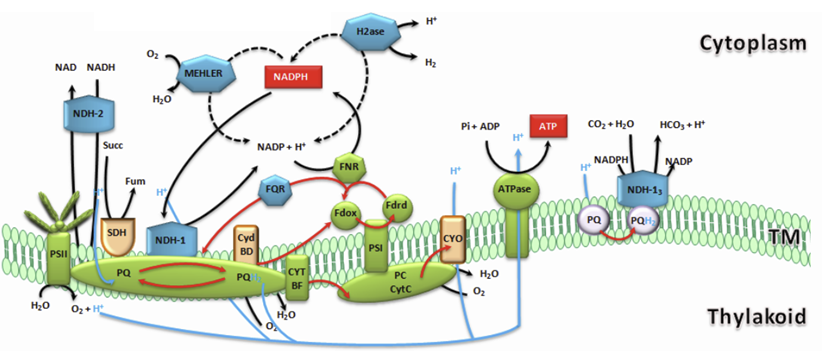

In this figure we can observe that the photosythesis subsystem does not include the dehydrogenases in the thylakoid membrane. These include NDH1_1u, NDH1_2u, NDH1_3u and NDH2_syn. The succinate dehydrogenase in the photosynthesis subsystem should be in the thylakoid membrane instead of the periplasmic membrane implying that SUCDpp_syn should be replaced with SUCDu_syn.

Using the Escher tools, a map can be created to reflect the photosynthetic operation of the iJN678 model.

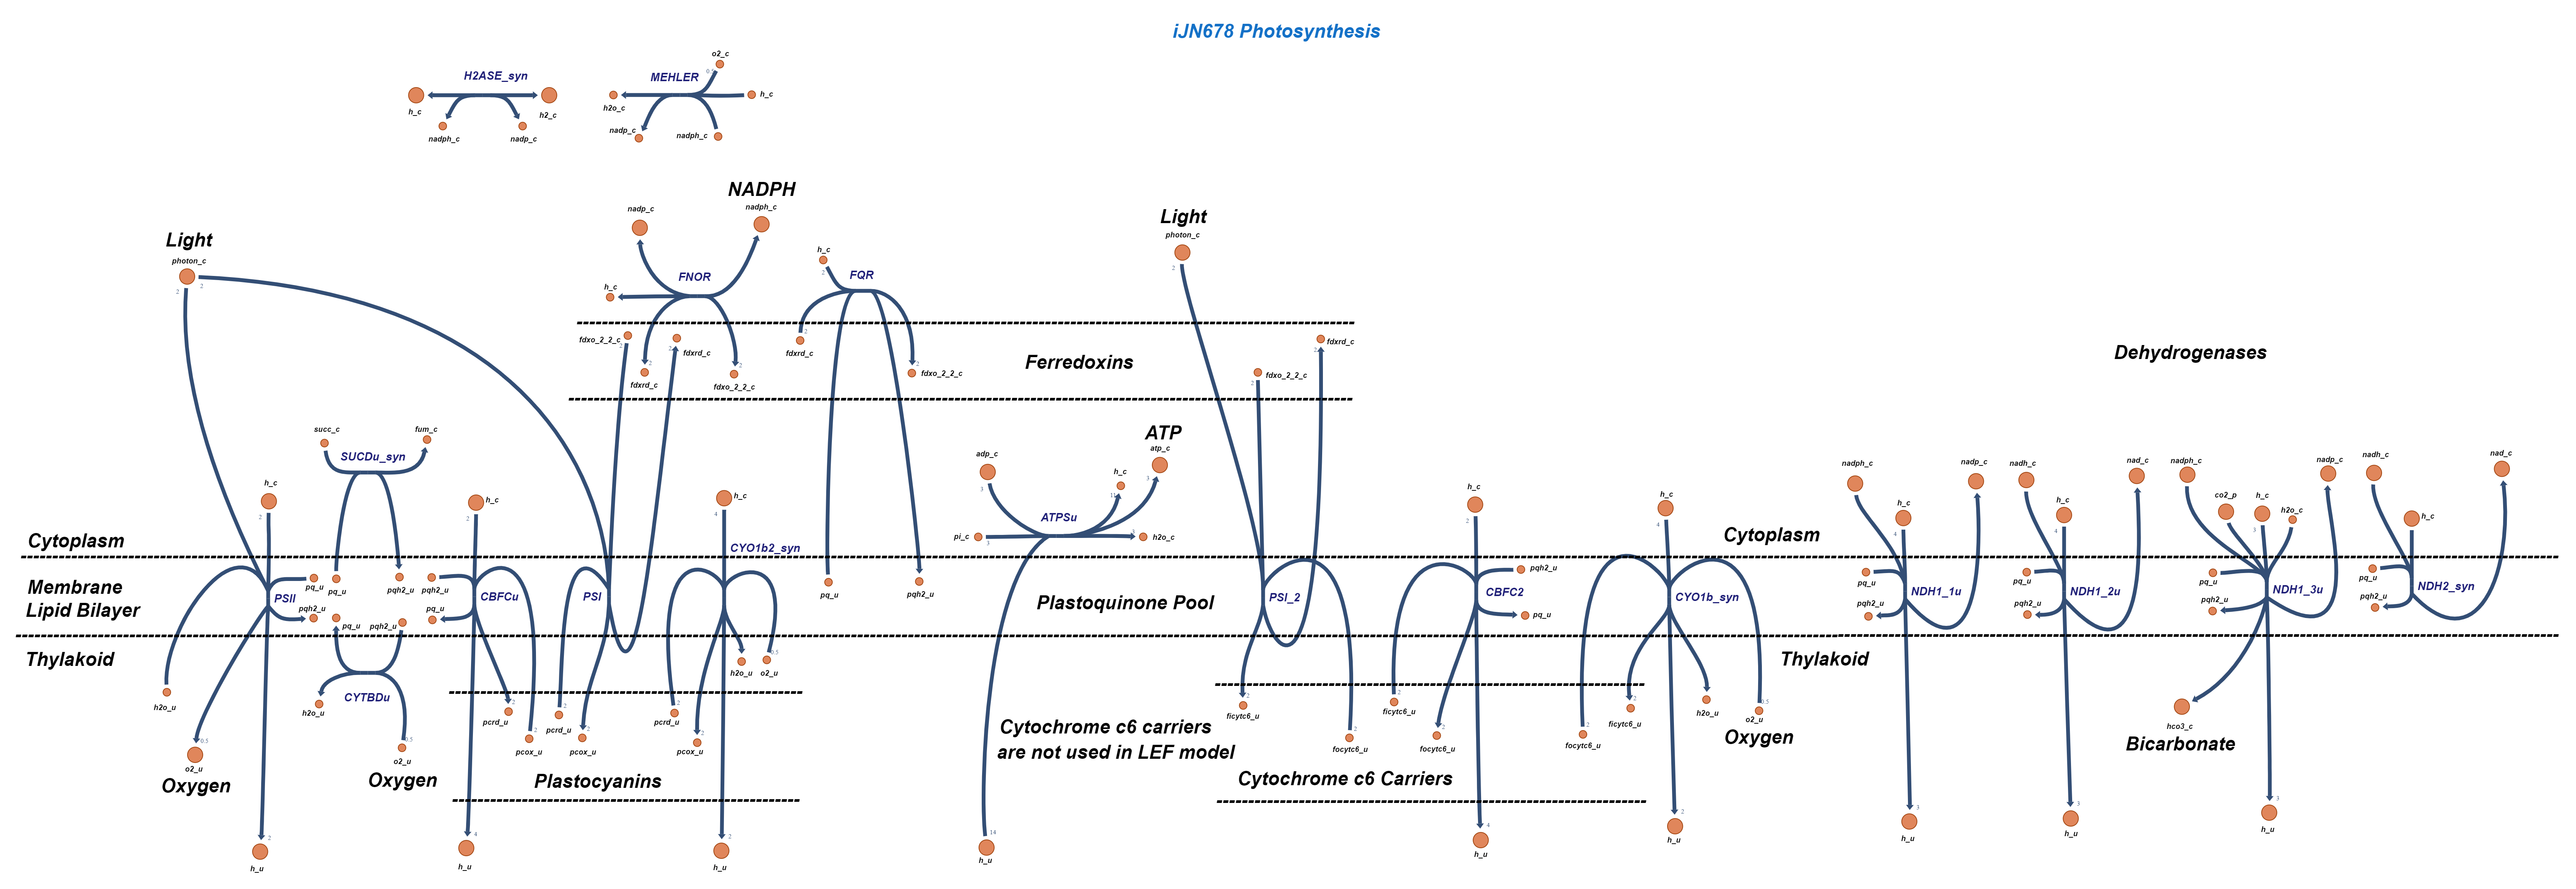

The map is entitled iJN678.Photosynthesis.json

# Metabolic Core in Autotrophic Conditions

## Optimized Photosynthetic Linear Electron Flow (LEF) - Simplified Photosynthesis

In order to simplify the photosynthesis process, only photosynthetic reactions placed in the thylakoid membrane will be allowed, and **only one electron carrier will be supported**. To create this condition, the following constraints were applied [1]:

- Since the blue copper protein plastocyanin (PC) and the heme protein cytochrome c6 (CytC) perform the same function in the photosynthetic electron-transport chain, **only PC was allowed as a soluble electron carrier**, accepting electrons from cytochrome b6f to reduce PSI. Thus, the fluxes across reactions CBFC2, PSI_2 and CYO1b_syn were constrained to zero.
- The NDH-1 complex can accept electrons from both NADPH and NADH. Since a specific NADH dehydrogenase was included in the reconstruction (NDH-2), **only NADPH was allowed as an electron donator to the NDH-1 complex** in order to simplify the analysis. For this, the fluxes across reactions NDH1_2u and NDH1_2p were constrained to zero.
- **Only the reactions placed in the thylakoid membrane were allowed**. The fluxes across reactions NDH1_1p, CYO1b2pp_syn, CYO1bpp_syn, CBFCpp and CYTBDpp were therefore constrained to zero.
- The reaction ferredoxin NADP+ reductase (FNOR) was assumed to be irreversible under autotrophic conditions.

Creating a Linear Electron Flow (LEF) model as outlined in Nogales (2012).[1] For this simulation **the carbon source is bicarbonate instead of carbon dioxide** to avoid reactions that converts nadph_c to nadp_c. If the desired carbon source is carbon dioxide (co2_e) instead of barcarbonate (hco3_e), the reaction NDH1_3u, an active CO2 transporter, will need to be enabled since the CO2 transport reaction CO2tpp is unidirectional and only allows the secretion of CO2. 

The following conditions are required for autotropic opoeration using bicarbonate as the carbon source and a photon flux of -100 mmol/gDW-hr.

In [8]:
model = model_orig.copy()
model.solver = "glpk"

# Set Biomass Function
model.objective = 'BIOMASS_Ec_SynAuto'
model.reactions.BIOMASS_Ec_SynHetero.bounds = [-0,0]
model.reactions.BIOMASS_Ec_SynMixo.bounds = [-0,0]

# Autotropic Conditions
model.reactions.EX_photon_e.bounds = [-100,0]
model.reactions.EX_glc__D_e.bounds = [-0,0]
model.reactions.EX_hco3_e.bounds = [-3.7,0]
#model.reactions.EX_co2_e.bounds = [-3.7,0] # Enable for using CO2 as the carbon source

# Constraining cytochrome c6-dependent reactions.
model.reactions.CBFC2.bounds = [-0,0]
model.reactions.PSI_2.bounds = [-0,0]
model.reactions.CYO1b_syn.bounds = [-0,0]
model.reactions.CYO1b2_syn.bounds = [-0,0] # test

# Constraining NADH-dependent reactions.
model.reactions.NDH1_2u.bounds = [-0,0]
model.reactions.NDH1_2p.bounds = [-0,0]

# Constraining peryplasmatic reactions.
model.reactions.NDH1_1p.bounds = [-0,0]
model.reactions.CYO1b2pp_syn.bounds = [-0,0]
model.reactions.CYO1bpp_syn.bounds = [-0,0]
model.reactions.CBFCpp.bounds = [-0,0]
model.reactions.CYTBDpp_1.bounds = [-0,0]

# Assume irreversibility of ferredoxin NADPH reductase under autotrophic conditions.
model.reactions.FNOR.lower_bound = 0

#Assume no excretion of CO2 under autotrophic conditions
model.reactions.EX_co2_e.upper_bound = 0

# Removing AEF pathways
model.reactions.NDH1_1u.bounds = [-0,0]
model.reactions.NDH2_syn.bounds = [-0,0]
model.reactions.NDH1_3u.bounds = [-0,0] # Enable if CO2 is the carbon source
model.reactions.FQR.bounds = [-0,0]
model.reactions.CYO1b_syn.bounds = [-0,0]
model.reactions.CYTBDu.bounds = [-0,0]
model.reactions.H2ASE_syn.bounds = [-0,0]
model.reactions.MEHLER.bounds = [-0,0]

# Limit photorespiratory reactions
model.reactions.RBPC.upper_bound = 4.30987
model.reactions.RBCh.upper_bound = 0.2045310

model.reactions.SUCDu_syn.bounds = [-0,0]
model.reactions.PSI_2.bounds = [-0,0]
model.reactions.CBFC2.bounds = [-0,0]

# Save autotropic LEF model for later use
model_LEF = model.copy()

# Calculate FBA
#solution = model.optimize()
solution = loopless_solution(model) # Calculate a loopless flux balance analysis

## Robustness Analysis

Let's begin by looking at the robustness analysis for oxygen.

In [9]:
RA_o2 = production_envelope(
    model, ["EX_o2_e"], objective="BIOMASS_Ec_SynAuto", carbon_sources="EX_hco3_e", points=100)
RA_o2.round(5)

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_hco3_e,0.0,NaN,NaN,0.00000,NaN,NaN,0.00000
1,EX_hco3_e,0.0,0.0,NaN,0.00064,8.69839,NaN,0.06914
2,EX_hco3_e,0.0,0.0,NaN,0.00128,8.69839,NaN,0.13828
3,EX_hco3_e,0.0,0.0,NaN,0.00192,8.69828,NaN,0.20742
4,EX_hco3_e,0.0,0.0,NaN,0.00256,8.69828,NaN,0.27657
5,EX_hco3_e,0.0,0.0,NaN,0.00320,8.69828,NaN,0.34571
6,EX_hco3_e,0.0,0.0,NaN,0.00384,8.69828,NaN,0.41485
7,EX_hco3_e,0.0,0.0,NaN,0.00448,8.69828,NaN,0.48399
8,EX_hco3_e,0.0,0.0,NaN,0.00512,8.69828,NaN,0.55313
9,EX_hco3_e,0.0,0.0,NaN,0.00576,8.69828,NaN,0.62227


Note that the peak growth occurs with an oxygen uptake of 6.36.

Now let's look at the robustness analysis plot

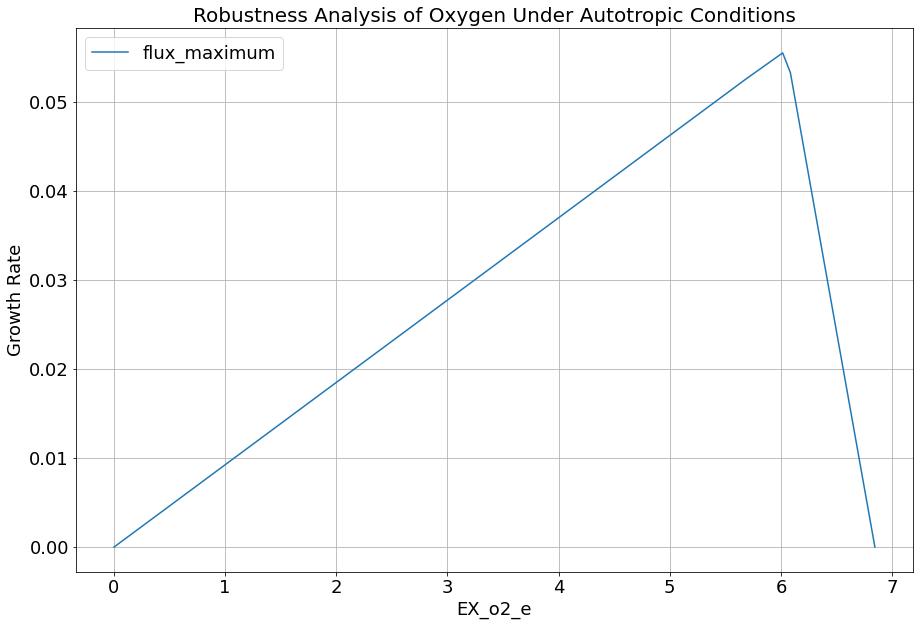

In [10]:
ax = RA_o2.plot(kind='line', x='EX_o2_e', y='flux_maximum',figsize=(15,10),fontsize=18,grid = True)
ax.set_xlabel('EX_o2_e',size = 18)
ax.set_ylabel('Growth Rate',size = 18)
ax.set_title('Robustness Analysis of Oxygen Under Autotropic Conditions',size = 20)
plt.legend(fontsize=18) 
plt.show();

Now let's look at the robustenss analysis for the carbon source hco3_e.

In [11]:
model.reactions.EX_hco3_e.bounds = [-12,0]
RA_hco3 = production_envelope(
    model, ["EX_hco3_e"], objective="BIOMASS_Ec_SynAuto", carbon_sources="EX_hco3_e", points=100)
RA_hco3.round(5)

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_hco3_e
0,EX_hco3_e,0.0,0.0,NaN,0.00000,0.00000,NaN,-5.58178
1,EX_hco3_e,0.0,0.0,NaN,0.00237,0.24708,NaN,-5.52540
2,EX_hco3_e,0.0,0.0,NaN,0.00475,0.49925,NaN,-5.46902
3,EX_hco3_e,0.0,0.0,NaN,0.00712,0.75667,NaN,-5.41264
4,EX_hco3_e,0.0,0.0,NaN,0.00949,1.01951,NaN,-5.35626
5,EX_hco3_e,0.0,0.0,NaN,0.01186,1.28795,NaN,-5.29988
6,EX_hco3_e,0.0,0.0,NaN,0.01424,1.56215,NaN,-5.24349
7,EX_hco3_e,0.0,0.0,NaN,0.01661,1.84232,NaN,-5.18711
8,EX_hco3_e,0.0,0.0,NaN,0.01898,2.12865,NaN,-5.13073
9,EX_hco3_e,0.0,0.0,NaN,0.02136,2.42134,NaN,-5.07435


Plotting the results

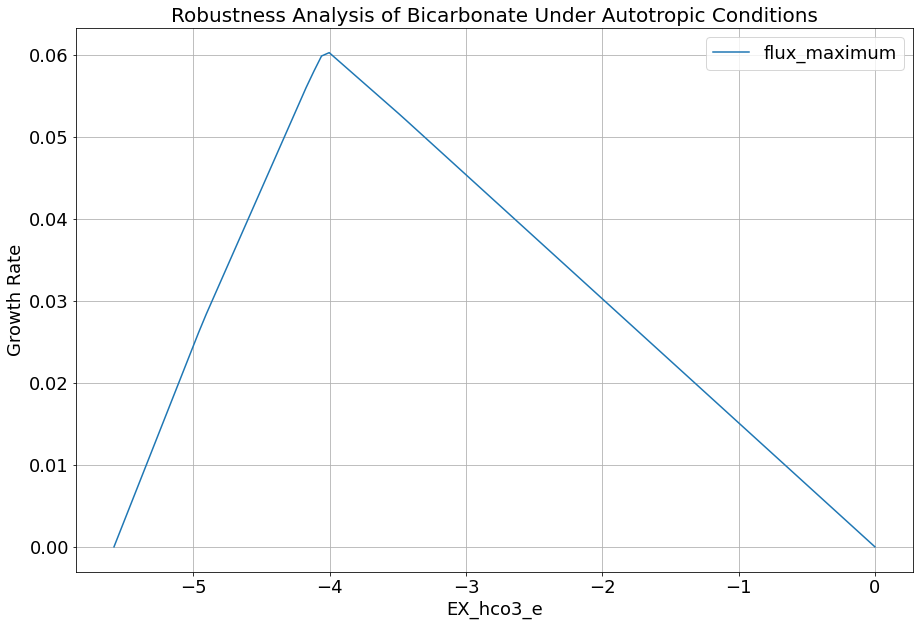

In [12]:
ax = RA_hco3.plot(kind='line', x='EX_hco3_e', y='flux_maximum',figsize=(15,10),fontsize = 18,grid=True)
ax.set_xlabel('EX_hco3_e',size = 18)
ax.set_ylabel('Growth Rate',size = 18)
ax.set_title('Robustness Analysis of Bicarbonate Under Autotropic Conditions',size = 20)
plt.legend(fontsize=18) 
plt.show();

Notice that the maximum growth of the cell occurs when the amount of bicarbonate that can be taken into the cell is -3.89 which is slidely larger that the -3.7 number recommended by Nogales [1].

## iJN678 Photosynthetic Machinery

Let's begin by looking at the fluxes flowing through the photosynthesis pathways of the LEF model.

Looking at the  model summary to see the key flux values for the optimized LEF model.

In [13]:
model = model_LEF.copy()
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0002518,0,0.00%
cobalt2_e,EX_cobalt2_e,0.0001815,0,0.00%
cu2_e,EX_cu2_e,0.0001679,0,0.00%
fe2_e,EX_fe2_e,0.0004178,0,0.00%
fe3_e,EX_fe3_e,0.0003805,0,0.00%
h_e,EX_h_e,4.937,0,0.00%
hco3_e,EX_hco3_e,3.7,1,100.00%
k_e,EX_k_e,0.009444,0,0.00%
mg2_e,EX_mg2_e,0.001606,0,0.00%
mn2_e,EX_mn2_e,0.0001691,0,0.00%


Notice that the optimal value of photon flux is not the maximum value of 100 but 51.28. Also note that the bicarbonate uptake has reached it's maximum value of -3.7. 

Now let's look at an Escher map to see the flux flow through the photosynthetic machinery. 

In [14]:
builder = Builder(
    model_json='./iJN678.json', 
)
builder.map_json = './iJN678.Photosynthesis.json'
builder

Builder()

In [15]:
builder.reaction_data = solution.fluxes

Note that the light flux enters photosystem II (PSII) reaction from the left. The flux then passes through the plastoquinone pool to the cytochrome b6/f complex (CBFCu). The electrons are then transported by the plastocyanin carriers (pq_u, pqh2_u) to photosystem I (PSI). The ferredoxin carriers (pcox_u, pcrd_u) will then carry the flux from PSI to the ferredoxin-NADP+ reductase (FNOR) which will create the major source of cellular nicotinamide adenine dinucleotide phosphate (nadph_c) as seen in the summary below. 

In [16]:
model.metabolites.nadph_c.summary()

Percent,Flux,Reaction,Definition
97.46%,8.451,FNOR,2.0 fdxrd_c + h_c + nadp_c --> 2.0 fdxo_2_2_c + nadph_c
2.37%,0.2059,ICDHyr,icit_c + nadp_c --> akg_c + co2_c + nadph_c
0.16%,0.01353,ME2,mal__L_c + nadp_c --> co2_c + nadph_c + pyr_c
0.01%,0.0005839,PHYTEDH2,nadp_c + phytoe_c --> h_c + nadph_c + phytof_c
0.01%,0.0005839,PHYTFDH2,nadp_c + phytof_c --> h_c + nadph_c + zcarote_c
0.00%,5.485E-06,SSALy,h2o_c + nadp_c + sucsal_c <=> 2.0 h_c + nadph_c + succ_c
Percent,Flux,Reaction,Definition
0.27%,-0.0232,3OAR100,3odecACP_c + h_c + nadph_c <=> 3hdecACP_c + nadp_c
0.25%,-0.02197,3OAR120,3oddecACP_c + h_c + nadph_c <=> 3hddecACP_c + nadp_c
0.01%,-0.001224,3OAR121,3ocddec5eACP_c + h_c + nadph_c --> 3hcddec5eACP_c + nadp_c


Note that over 97% of the cells NADPH is created by the reaction FNOR!

The proto-motive force, which has been created by the pumping of protons from the cytoplasm to the thylakoid, will force protons through the ATP synthetase (ATPSu) to create the majority of cellular ATP as shown below.

In [17]:
model.metabolites.atp_c.summary()

Percent,Flux,Reaction,Definition
1.52%,0.263,ATPS4rpp_1,3.0 adp_c + 14.0 h_p + 3.0 pi_c --> 3.0 atp_c + 3.0 h2o_c + 11.0 h_c
95.55%,16.48,ATPSu,3.0 adp_c + 14.0 h_u + 3.0 pi_c --> 3.0 atp_c + 3.0 h2o_c + 11.0 h_c
0.00%,1.245E-05,PPK2,atp_c + ppi_c <=> adp_c + pppi_c
2.91%,0.5027,PYK,adp_c + h_c + pep_c --> atp_c + pyr_c
0.01%,0.001474,URIDK2r,atp_c + dump_c <=> adp_c + dudp_c
Percent,Flux,Reaction,Definition
0.95%,-0.1644,ACCOAC,accoa_c + atp_c + hco3_c <=> adp_c + h_c + malcoa_c + pi_c
0.88%,-0.1514,ACGK,acglu_c + atp_c --> acg5p_c + adp_c
0.06%,-0.01086,ACKr,ac_c + atp_c <=> actp_c + adp_c
0.00%,-1.245E-05,ADCPS2,adcobhex_c + applp_c + atp_c --> adocbip_c + adp_c + h_c + pi_c


## Optimized LEF Model Core Metabolic Fluxes 

Let's now explore the optimized fluxes through the main metabolic core of iJN678 using the LEF model under autotrophic conditions.

A metabolic map of the iJN678 core metabolism is provided in Nogales(2012)[1]. It outlines the Calvin Cycle in autotrophic conditions, as shown below.

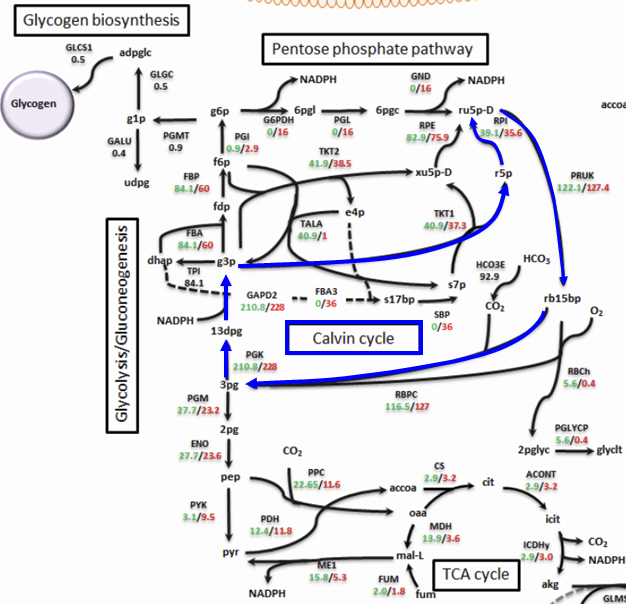

Now let's look at the fluxes created in the metabolic core of iJN678.

In [18]:
model2 = model_LEF.copy()
solution2 = loopless_solution(model2)

Let's first look at the model summary to explore the uptake and secretion.

In [19]:
model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.0002518,0,0.00%
cobalt2_e,EX_cobalt2_e,0.0001815,0,0.00%
cu2_e,EX_cu2_e,0.0001679,0,0.00%
fe2_e,EX_fe2_e,0.0004178,0,0.00%
fe3_e,EX_fe3_e,0.0003805,0,0.00%
h_e,EX_h_e,4.937,0,0.00%
hco3_e,EX_hco3_e,3.7,1,100.00%
k_e,EX_k_e,0.009444,0,0.00%
mg2_e,EX_mg2_e,0.001606,0,0.00%
mn2_e,EX_mn2_e,0.0001691,0,0.00%


Notice that the optimized photon flux is 51.28 instead of the maximum of 100. 

Plotting all the fluxes for the optimized LEF model.

In [20]:
solution_frame = solution.to_frame()
solution_frame = solution_frame.sort_index()
solution_frame.round(5)

,fluxes,reduced_costs
34DHOXPEGOX,0.00000,1.00000
34HPPOR,0.00003,-1.00000
3HAD100,0.02320,-1.00000
3HAD120,0.02197,-1.00000
3HAD121,0.00122,-1.00000
3HAD140,0.01634,-1.00000
3HAD141,0.00122,-1.00000
3HAD160,0.01634,-1.00000
3HAD161,0.00122,-1.00000
3HAD180,0.00708,-1.00000


Notice that the optimized photon flux is 51.28 instead of the maximum of 100. 

Let's plot these fluxes on an Escher map of iJN678 (included in the current directory)

In [21]:
builder2 = Builder(
    model_json='./iJN678.json', 
)
builder2.map_json = './iJN678.Core_metabolism.json'
builder2

Builder()

In [22]:
builder2.reaction_data = solution2.fluxes

On this map the carbon enters the cell through the bicarbonate exchange reaction at the lower right (hco3_e -> hco3_p -> hco3_c). The carbon then enters the Calvin Cycle where it is distributed through the cell to provide the necessary precursors for growth. At the same time the photosynthesis machinery has created the necessary energy (atp_c) and reducing power (nadph_c) to allow the cell to grow. 

## Exploring the LEF Model Fluxes as the Photon Flux Varies

Create flux data for the reactions in the photosynthesis pathways as the photon flux changes from 1 to 100.

In [23]:
%matplotlib inline

model3 = model_LEF.copy()

p_reactions = ['PSII','CYTBDu','SUCDu_syn','CBFCu','PSI','CYO1b2_syn','ATPSu','PSI_2',
               'CBFC2','CYO1b_syn','NDH1_1u','NDH1_2u','NDH1_3u','FNOR','FQR',
               'H2ASE_syn','MEHLER','HCO3E','BIOMASS_Ec_SynAuto','EX_no3_e',
               'RBPC','RBCh','GLCS1'] # Photosynthesis reactions
tsolution = []
for i in range(100):
    model3.reactions.EX_photon_e.bounds = [-i,-i] # Adjust the photon flux to go from 0 to -100
    #tsolution.append(model3.optimize()) # For each photon flux value do FBA
    tsolution.append(loopless_solution(model3)) # For each photon flux value do FBA
f = []
df2 = pd.DataFrame()
for reaction in p_reactions:
    f=[]
    for i in range(100):
        f.append(tsolution[i].fluxes[reaction]) # Create a list of fluxes for a given reaction
    df = pd.DataFrame(f) # Convert the list to a Pandas Dataframe
    df2[reaction] = df.round(5) # Add the new dataframe to the dataframe that will hold all the fluxes
df2

/opt/anaconda3/envs/Combined/lib/python3.8/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


,PSII,CYTBDu,SUCDu_syn,CBFCu,PSI,CYO1b2_syn,ATPSu,PSI_2,CBFC2,CYO1b_syn,...,FNOR,FQR,H2ASE_syn,MEHLER,HCO3E,BIOMASS_Ec_SynAuto,EX_no3_e,RBPC,RBCh,GLCS1
0,0.00,0.0,0.0,0.00,0.00,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.25,0.0,0.0,0.25,0.25,0.0,0.10714,0.0,0.0,0.0,...,0.16232,0.0,0.0,0.0,-0.07037,0.00109,-0.02376,0.07836,0.00253,0.00023
2,0.50,0.0,0.0,0.50,0.50,0.0,0.21429,0.0,0.0,0.0,...,0.32463,0.0,0.0,0.0,-0.14074,0.00219,-0.04751,0.15672,0.00506,0.00046
3,0.75,0.0,0.0,0.75,0.75,0.0,0.32143,0.0,0.0,0.0,...,0.48696,0.0,0.0,0.0,-0.21111,0.00328,-0.07126,0.23508,0.00760,0.00069
4,1.00,0.0,0.0,1.00,1.00,0.0,0.42857,0.0,0.0,0.0,...,0.64928,0.0,0.0,0.0,-0.28148,0.00437,-0.09502,0.31344,0.01013,0.00092
5,1.25,0.0,0.0,1.25,1.25,0.0,0.53571,0.0,0.0,0.0,...,0.81161,0.0,0.0,0.0,-0.35185,0.00547,-0.11877,0.39180,0.01266,0.00115
6,1.50,0.0,0.0,1.50,1.50,0.0,0.64286,0.0,0.0,0.0,...,0.97393,0.0,0.0,0.0,-0.42222,0.00656,-0.14252,0.47016,0.01519,0.00138
7,1.75,0.0,0.0,1.75,1.75,0.0,0.75000,0.0,0.0,0.0,...,1.13625,0.0,0.0,0.0,-0.49259,0.00766,-0.16628,0.54852,0.01772,0.00161
8,2.00,0.0,0.0,2.00,2.00,0.0,0.85714,0.0,0.0,0.0,...,1.29857,0.0,0.0,0.0,-0.56296,0.00875,-0.19003,0.62688,0.02025,0.00184
9,2.25,0.0,0.0,2.25,2.25,0.0,0.96429,0.0,0.0,0.0,...,1.46089,0.0,0.0,0.0,-0.63333,0.00984,-0.21378,0.70524,0.02279,0.00207


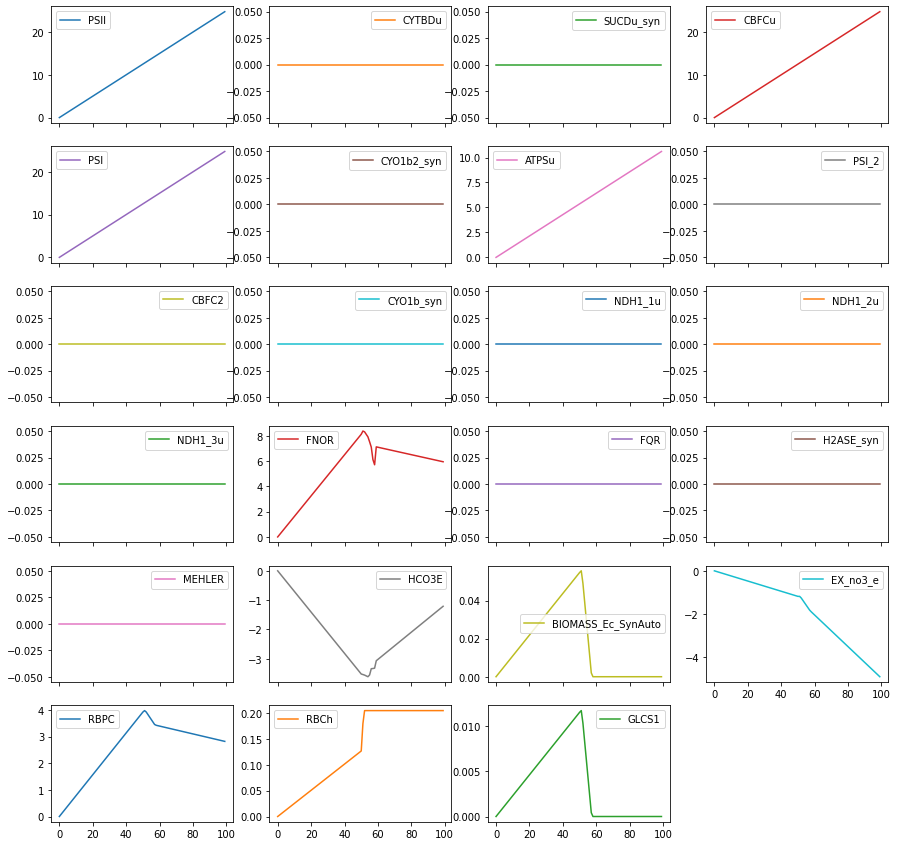

In [24]:
df2.plot(subplots=True, layout=(6,4),figsize=(15,15));

Remember that the constraints for these plots are based on the fact that all the Alternate Electron Flow (AEF) pathways has been shut down, only the linear electron flow pathways are supported. By looking at these plots, and the earlier model summary, the light limited state (LLS) covers a range of photon flux from 0 to 51. After that, the carbon (Ci) limited state (CLS) begins. Under CLS, the high level of reducing equivalents produced exceeded the energy-dissipation capabilities of the NO3 reduction pathway, and the model could not grow.

Let's allow one AEF pathway, cytochrome CYO1b2_syn, and look at the differences in the plots.

In [25]:
model4 = model_LEF.copy()
model4.reactions.CYO1b2_syn.bounds = [-1000,1000]

builder4 = Builder(
    model_json='./iJN678.json', 
)
builder4.map_json = './iJN678.Photosynthesis.json'
builder4

Builder()

In [26]:
solution4 = loopless_solution(model4)
builder4.reaction_data = solution4.fluxes

In [27]:
tsolution = []
for i in range(100):
    model4.reactions.EX_photon_e.bounds = [-i,-i] # Adjust the photon flux to go from 0 to -100
    tsolution.append(loopless_solution(model4)) # For each photon flux value do FBA
f = []
df3 = pd.DataFrame()
for reaction in p_reactions:
    f=[]
    for i in range(100):
        f.append(tsolution[i].fluxes[reaction]) # Create a list of fluxes for a given reaction
    df = pd.DataFrame(f) # Convert the list to a Pandas Dataframe
    df3[reaction] = df.round(5) # Add the new dataframe to the dataframe that will hold all the fluxes
df3

,PSII,CYTBDu,SUCDu_syn,CBFCu,PSI,CYO1b2_syn,ATPSu,PSI_2,CBFC2,CYO1b_syn,...,FNOR,FQR,H2ASE_syn,MEHLER,HCO3E,BIOMASS_Ec_SynAuto,EX_no3_e,RBPC,RBCh,GLCS1
0,0.00000,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.27034,0.0,0.0,0.27034,0.22966,0.04068,0.12167,0.0,0.0,0.0,...,0.17423,0.0,0.0,0.0,-0.06767,0.00174,-0.01567,0.08479,0.00402,0.00037
2,0.54068,0.0,0.0,0.54068,0.45932,0.08137,0.24335,0.0,0.0,0.0,...,0.34846,0.0,0.0,0.0,-0.13534,0.00348,-0.03134,0.16957,0.00805,0.00073
3,0.81103,0.0,0.0,0.81103,0.68897,0.12205,0.36502,0.0,0.0,0.0,...,0.52269,0.0,0.0,0.0,-0.20301,0.00521,-0.04700,0.25436,0.01207,0.00110
4,1.08137,0.0,0.0,1.08137,0.91863,0.16273,0.48669,0.0,0.0,0.0,...,0.69692,0.0,0.0,0.0,-0.27068,0.00695,-0.06267,0.33915,0.01609,0.00146
5,1.35171,0.0,0.0,1.35171,1.14829,0.20342,0.60836,0.0,0.0,0.0,...,0.87115,0.0,0.0,0.0,-0.33836,0.00869,-0.07834,0.42394,0.02012,0.00183
6,1.62205,0.0,0.0,1.62205,1.37795,0.24410,0.73004,0.0,0.0,0.0,...,1.04538,0.0,0.0,0.0,-0.40603,0.01043,-0.09401,0.50872,0.02414,0.00219
7,1.89239,0.0,0.0,1.89239,1.60761,0.28479,0.85171,0.0,0.0,0.0,...,1.21960,0.0,0.0,0.0,-0.47370,0.01217,-0.10968,0.59351,0.02817,0.00256
8,2.16273,0.0,0.0,2.16273,1.83727,0.32547,0.97338,0.0,0.0,0.0,...,1.39383,0.0,0.0,0.0,-0.54137,0.01391,-0.12534,0.67830,0.03219,0.00292
9,2.43308,0.0,0.0,2.43308,2.06692,0.36615,1.09505,0.0,0.0,0.0,...,1.56806,0.0,0.0,0.0,-0.60904,0.01564,-0.14101,0.76309,0.03621,0.00329


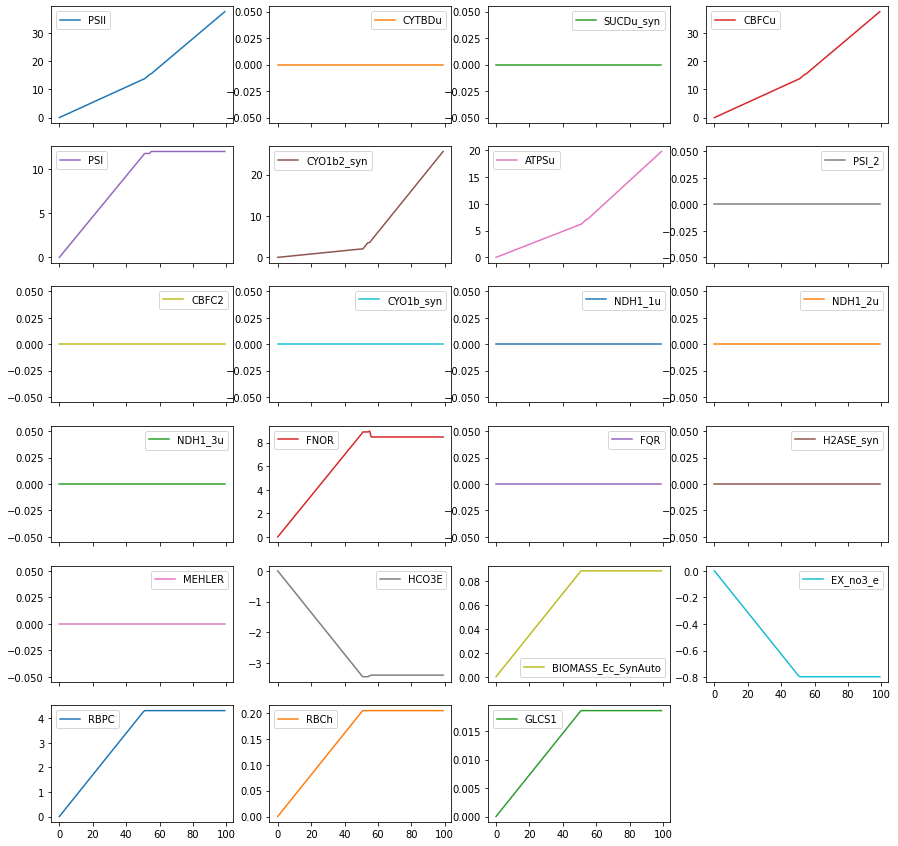

In [28]:
df3.plot(subplots=True, layout=(6,4),figsize=(15,15));

In particular, look at the biomass growth. In this case the CLS part of the plots doesn't go to zero but holds constant at the maximum optimized rate that is limited by the uptake of the carbon source, hco3_c, in the HCO3E reaction. Try enabling any of the other AEF reactions and look at the difference. Your results can be compared to Nogales(2012)[1].

## Flux Variability Analysis of the Autotrophic iJN678 model

Let's now look at the flux variability analysis for the the LEF model.

In [29]:
from cobra.flux_analysis import flux_variability_analysis
model5=model_LEF.copy()
model5.objective = 'BIOMASS_Ec_SynAuto'

fva = flux_variability_analysis(model5, reaction_list = p_reactions, loopless=True, 
                                fraction_of_optimum=0.99)
fva.sort_index()

,minimum,maximum
ATPSu,5.422068,5.500416
BIOMASS_Ec_SynAuto,0.055259,0.055818
CBFC2,0.000000,0.000000
CBFCu,12.651492,12.834303
CYO1b2_syn,0.000000,0.000000
CYO1b_syn,0.000000,0.000000
CYTBDu,0.000000,0.000000
EX_no3_e,-1.191059,-1.169986
FNOR,8.256111,8.464095
FQR,0.000000,0.000000


From this info we can see that the LEF configuration will not allow through most of the AEF pathways (CBFC2, CYO1b2_syn, CYO1b_syn, CYTBDu, FQR, H2ASE_syn, MEHLER, NDH1_1u, NDH1_2u, NDH1_3u, PSI_1, and SUCDu_syn) under any conditions.  This is also what we see in operation. 

If any inital condition changes, it can impact the flux spans in FVA.

## References
1. Nogales, J., S. Gudmundsson, et al. (2012). "Detailing the optimality of photosynthesis in cyanobacteria through systems biology analysis." Proceedings of the National Academy of Sciences of the United States of America 109(7): 2678-2683.